# Using classic ML to predict author characteristics

In [18]:
from pathlib import Path
import pandas as pd
import numpy as np

DATASET_PATH = Path.cwd().parent / "Data" / "data_set.csv"
data_data_frame = pd.read_csv(DATASET_PATH)

np.random.seed(36)

data_data_frame.head()

,content,sex,hebrew_speaker,birth_period,death_period,birth_place_israel,death_place_israel
0,\t \t \t לידידי הרב החכם רב-הפעלים מ...,0,1,3,3,0,0
1,\t \t \t לא. ד. גורדון היום הלך ו...,1,1,3,4,0,1
2,"\t \t \t שלום רב שובך, צפרה נחמדת, מאר...",0,1,3,4,0,0
3,"\t \t \t משוט במרחקים, ממקומות נדדתי, ...",0,1,3,4,0,0
4,\t \t \t לשיר בנגון אקדמות אלף – אבטיח...,0,1,3,4,0,1


In [19]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_data_frame, train_size=0.8)

for label in ['sex', 'hebrew_speaker', 'birth_period', 'death_period', 'birth_place_israel',
                    'death_place_israel']:
    print(label, len(set(train[label])), len(set(test[label])))

sex 2 2
hebrew_speaker 2 2
birth_period 5 5
death_period 5 6
birth_place_israel 2 2
death_place_israel 2 2


## Author sex

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1349
           1       1.00      0.02      0.04        49

    accuracy                           0.97      1398
   macro avg       0.98      0.51      0.51      1398
weighted avg       0.97      0.97      0.95      1398



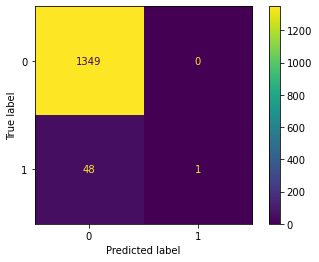

In [31]:
from imblearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt

vectorizer = CountVectorizer(ngram_range=(1,2))
transformer = TfidfTransformer(use_idf=False)
smote = SMOTE(sampling_strategy=0.1)
under_sampler = RandomUnderSampler(sampling_strategy=0.5)
algo=RandomForestClassifier()

pipe = Pipeline([('vectorizer', vectorizer),
                 ('transformer', transformer),
                 ('over_sample', smote),
                 ('under_sample', under_sampler),
                 #('feature_select', SelectKBest(chi2, k=20000)),
                 ('algo', algo)])

pipe.fit(train.content, train.sex)
prediction = pipe.predict(test.content)
print(classification_report(test.sex, prediction))
plot_confusion_matrix(pipe, test.content, test.sex)
plt.show()

## Translated songs

              precision    recall  f1-score   support

           0       0.57      0.09      0.16        43
           1       0.97      1.00      0.98      1355

    accuracy                           0.97      1398
   macro avg       0.77      0.55      0.57      1398
weighted avg       0.96      0.97      0.96      1398



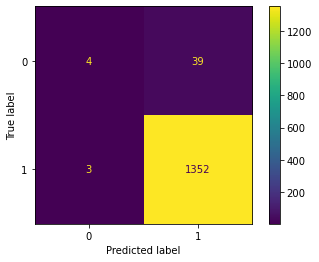

In [21]:
pipe.fit(train.content, train.hebrew_speaker)
prediction = pipe.predict(test.content)
print(classification_report(test.hebrew_speaker, prediction))
plot_confusion_matrix(pipe, test.content, test.hebrew_speaker)
plt.show()

## Author born in Israel

C:\Users\aviadud\.conda\envs\hebnlp38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aviadud\.conda\envs\hebnlp38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aviadud\.conda\envs\hebnlp38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1389
           1       0.00      0.00      0.00         9

    accuracy                           0.99      1398
   macro avg       0.50      0.50      0.50      1398
weighted avg       0.99      0.99      0.99      1398



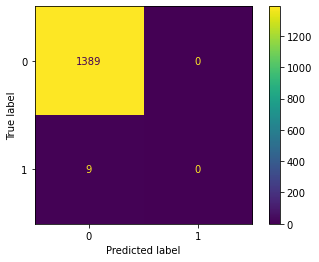

In [22]:
pipe.fit(train.content, train.birth_place_israel)
prediction = pipe.predict(test.content)
print(classification_report(test.birth_place_israel, prediction))
plot_confusion_matrix(pipe, test.content, test.birth_place_israel)
plt.show()

## Author died in Israel

              precision    recall  f1-score   support

           0       0.74      0.99      0.84       997
           1       0.81      0.11      0.20       401

    accuracy                           0.74      1398
   macro avg       0.77      0.55      0.52      1398
weighted avg       0.76      0.74      0.66      1398



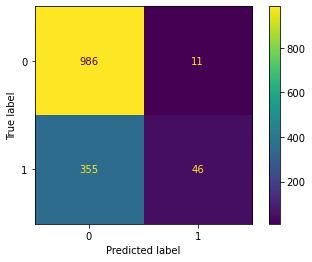

In [32]:
smote = SMOTE()

pipe = Pipeline([('vectorizer', vectorizer),
                 ('transformer', transformer),
                 ('over_sample', smote),
                 #('feature_select', SelectKBest(chi2, k=20000)),
                 ('algo', algo)])

pipe.fit(train.content, train.death_place_israel)
prediction = pipe.predict(test.content)
print(classification_report(test.death_place_israel, prediction))
plot_confusion_matrix(pipe, test.content, test.death_place_israel)
plt.show()

## Author birth time period

C:\Users\aviadud\.conda\envs\hebnlp38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aviadud\.conda\envs\hebnlp38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aviadud\.conda\envs\hebnlp38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.84      0.96      0.90       633
           2       1.00      0.06      0.12        78
           3       0.80      0.89      0.84       603
           4       0.00      0.00      0.00        74

    accuracy                           0.82      1398
   macro avg       0.53      0.38      0.37      1398
weighted avg       0.78      0.82      0.78      1398



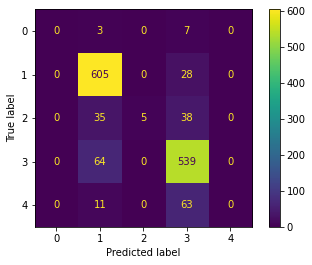

In [28]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('vectorizer', vectorizer),
                 ('transformer', transformer),
                 #('feature_select', SelectKBest(chi2, k=20000)),
                 ('algo', algo)])

pipe.fit(train.content, train.birth_period)
prediction = pipe.predict(test.content)
print(classification_report(test.birth_period, prediction))
plot_confusion_matrix(pipe, test.content, test.birth_period)
plt.show()

## Author death time period

C:\Users\aviadud\.conda\envs\hebnlp38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aviadud\.conda\envs\hebnlp38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aviadud\.conda\envs\hebnlp38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.83      0.96      0.89       608
           2       1.00      0.14      0.24        74
           3       1.00      0.03      0.07        88
           4       0.82      0.91      0.87       617
           5       0.00      0.00      0.00         1

    accuracy                           0.83      1398
   macro avg       0.61      0.34      0.34      1398
weighted avg       0.84      0.83      0.79      1398



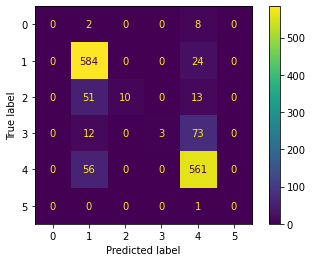

In [29]:
pipe.fit(train.content, train.death_period)
prediction = pipe.predict(test.content)
print(classification_report(test.death_period, prediction))
plot_confusion_matrix(pipe, test.content, test.death_period)
plt.show()